<a href="https://colab.research.google.com/github/Tatianacp1/prueba/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import openpyxl as opx
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals

### Lectura de bases, por drive o cargandolas directamente del escritorio.

In [119]:
from google.colab import drive #Para que permita abrir Drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
#BASE DE DATOS (ACTUALIZADA PARA EL DÍA 24 DE NOVIEMBRE)
casos = pd.read_csv('/content/drive/MyDrive/Casos_positivos_de_COVID-19_en_Colombia (1).csv')
casos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


In [122]:
casos[casos['Fecha de diagnóstico'] == '23/11/2021 0:00:00'] 

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
1460793,24/11/2021 0:00:00,"5,053,764",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,20,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460798,24/11/2021 0:00:00,"5,053,774",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,18,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460799,24/11/2021 0:00:00,"5,053,775",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460803,24/11/2021 0:00:00,"5,053,824",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460804,24/11/2021 0:00:00,"5,053,825",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,17,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461059,24/11/2021 0:00:00,"5,055,135",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,40,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461066,24/11/2021 0:00:00,"5,055,145",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,49,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461068,24/11/2021 0:00:00,"5,055,147",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,37,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461079,24/11/2021 0:00:00,"5,055,233",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,37,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN


Hay 69 nuevos diagnósticos para el 23 de noviembre del 2021 

In [123]:
casos['Tipo de contagio'].value_counts()

En estudio     708447
Relacionado    527879
Comunitaria    223821
Importado         939
Name: Tipo de contagio, dtype: int64

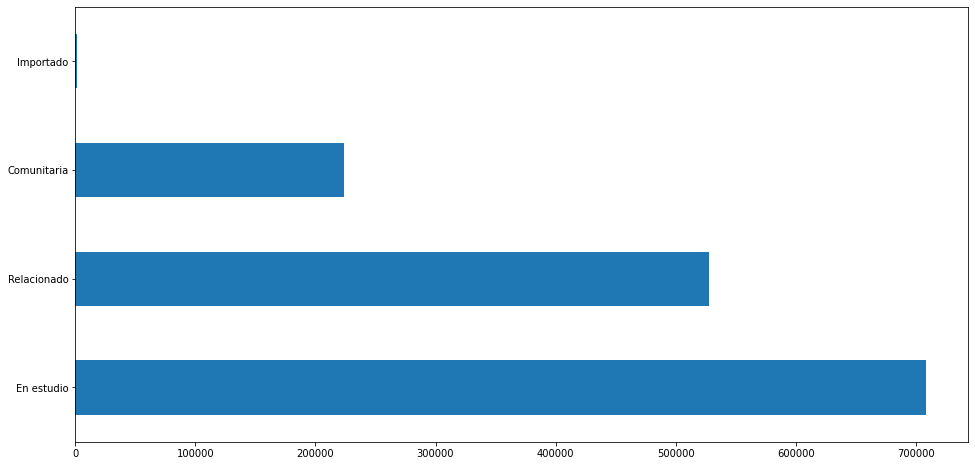

In [132]:
plt.figure(figsize=(16,8))
casos['Tipo de contagio'].value_counts().plot.barh()


Hay 708447 diagnósticos que están estudio para determinar el tipo de contagio

In [124]:
casos['Ubicación del caso'].value_counts()


Casa            1427814
Fallecido         27720
casa                558
Hospital             95
Hospital UCI         92
Name: Ubicación del caso, dtype: int64

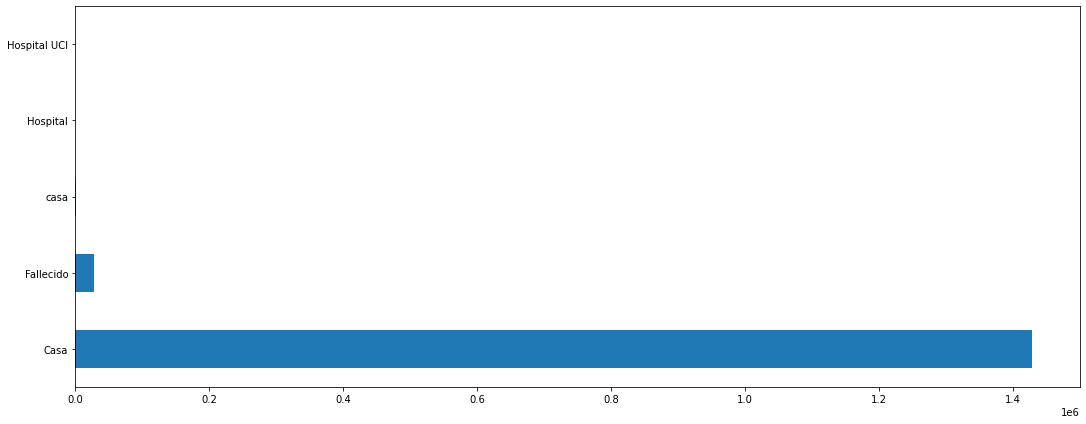

In [134]:
plt.figure(figsize=(18,7))
casos['Ubicación del caso'].value_counts().plot.barh()


De las personas diagnosticadas por COVID-19 en Bogotá hay 1'427.814 que se encuentran en la casa y lastimosamente 27.720 perdieron la vida.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


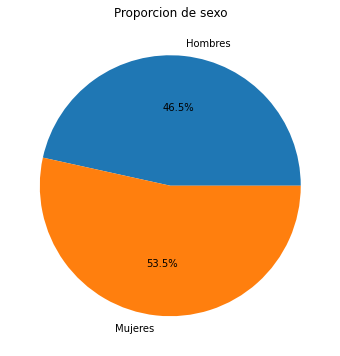

In [140]:
x = casos[['Sexo']]=="M"
z1= x.sum()/len(casos[['Sexo']])


y= casos[['Sexo']]=="F"
z2= y.sum()/len(casos[['Sexo']])

plt.figure(figsize=(6,6))
labels = ["Hombres","Mujeres"]
z=[z1,z2]
plt.pie(z, labels=labels, autopct='%1.1f%%')
plt.title('Proporcion de sexo')
plt.show()


Dentro de las personas que resultaron positivas para el coronavirus se presentan más cantidad de mujeres que de hombres.


In [141]:
casos['Nombre del país'].value_counts()

ESTADOS UNIDOS DE AMÉRICA                          350
ESPAÑA                                             123
MÉXICO                                             110
REPÚBLICA DOMINICANA                                33
ECUADOR                                             31
PANAMÁ                                              31
BRASIL                                              29
CHILE                                               25
TURQUÍA                                             17
FRANCIA                                             17
EL SALVADOR                                         14
EGIPTO                                              12
REINO UNIDO DE GRAN BRETAÑA E IRLANDA DEL NORTE     12
PERÚ                                                11
ARGENTINA                                           11
PUERTO RICO                                         10
ITALIA                                               8
ALEMANIA                                             8
PANAMA    

De las personas que llegaron a Colombia de otros paises se encontraban más frecuente en los Estados Unidos de América, siguiente de España y México.


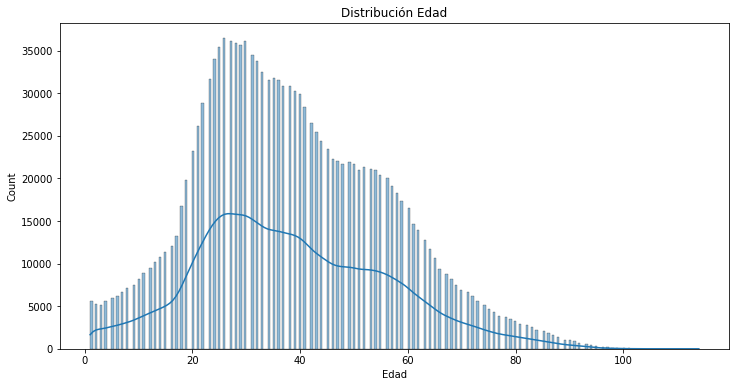

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.histplot(data=casos, x='Edad', kde=True,ax=ax)
ax.set_title("Distribución Edad")
ax.set_xlabel('Edad');

Se puede observar que entre 20 y 60 años es donde se presentan más casos positivos. 

In [144]:
casos['Recuperado'].value_counts()

Recuperado    1426800
Fallecido       27606
Activo           2800
fallecido         114
Name: Recuperado, dtype: int64

In [148]:
casos['Recuperado'].value_counts()

Recuperado    1426800
Fallecido       27606
Activo           2800
fallecido         114
Name: Recuperado, dtype: int64

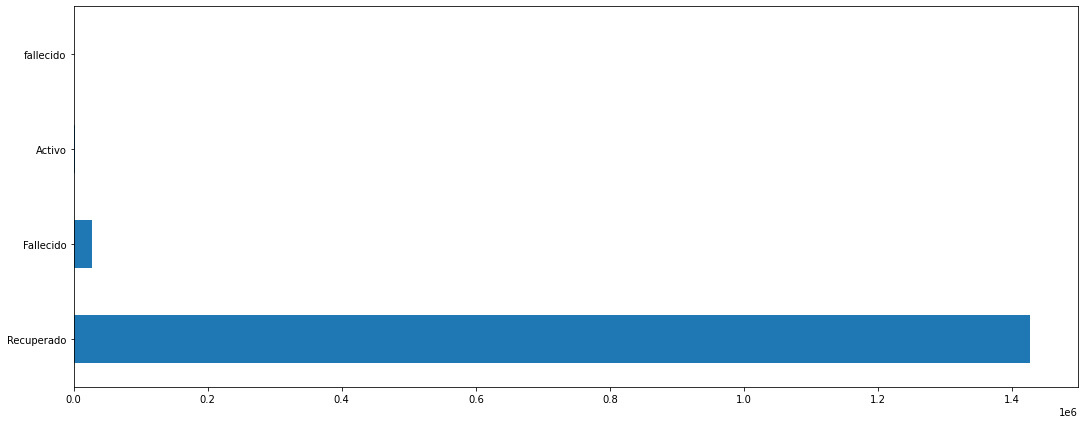

In [147]:
plt.figure(figsize=(18,7))
casos['Recuperado'].value_counts().plot.barh()

In [149]:
27606+114

27720

De las personas que tuvieran coronavirus 1'426.800 personas se han recuperado de este y 27.720 han fallecido.


In [150]:
casos['Pertenencia étnica'].value_counts()

6.0    1438871
1.0      10348
5.0      10052
2.0         23
3.0          4
Name: Pertenencia étnica, dtype: int64

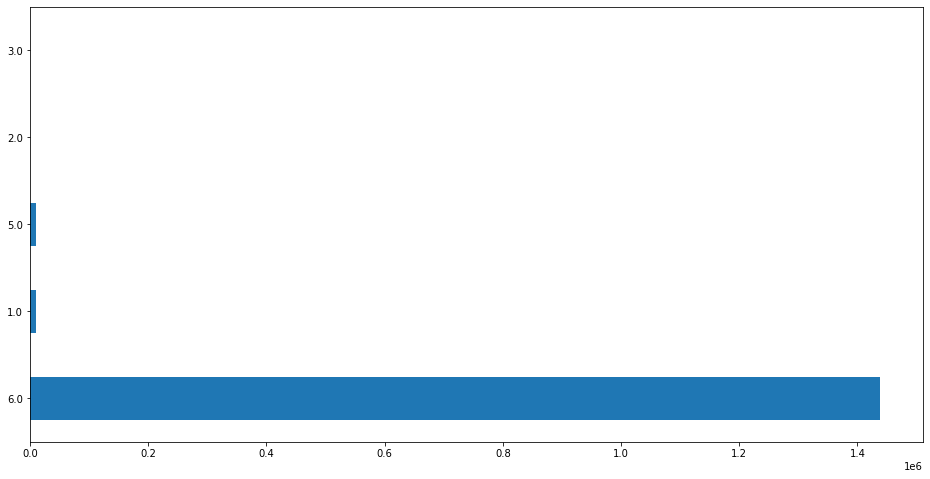

In [155]:
plt.figure(figsize=(16,8))
casos['Pertenencia étnica'].value_counts().plot.barh()

De acuerdo al pertenencia étnica 1'438.871 de las personas pertenecen a otro tipo de étnica, seguido de 10.348 que pertenecen al grupo étnico Indígena.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


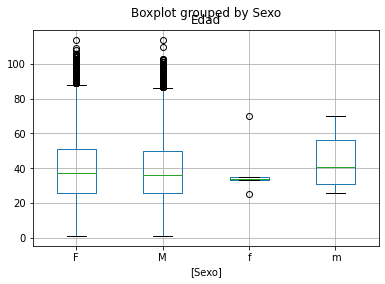

In [156]:
casos[['Edad','Sexo']].boxplot(by='Sexo')

In [ ]:
nov_23 = casos[casos['Fecha de diagnóstico'] == '23/11/2021 0:00:00'].index
casos_1 = casos.drop(nov_23)
casos_1

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461080,24/11/2021 0:00:00,"5,055,235",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,46,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461081,24/11/2021 0:00:00,"5,055,249",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,60,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461082,24/11/2021 0:00:00,"5,055,275",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,31,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461083,24/11/2021 0:00:00,"5,055,276",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN


In [157]:
casos.shape

(1461086, 23)

In [158]:
casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461086 entries, 0 to 1461085
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   fecha reporte web             1461086 non-null  object 
 1   ID de caso                    1461086 non-null  object 
 2   Fecha de notificación         1461086 non-null  object 
 3   Código DIVIPOLA departamento  1461086 non-null  int64  
 4   Nombre departamento           1461086 non-null  object 
 5   Código DIVIPOLA municipio     1461086 non-null  object 
 6   Nombre municipio              1461086 non-null  object 
 7   Edad                          1461086 non-null  int64  
 8   Unidad de medida de edad      1461086 non-null  int64  
 9   Sexo                          1461086 non-null  object 
 10  Tipo de contagio              1461086 non-null  object 
 11  Ubicación del caso            1456279 non-null  object 
 12  Estado                      

In [159]:
casos.isna().sum()

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                 4807
Estado                             4807
Código ISO del país             1460147
Nombre del país                 1460147
Recuperado                         3766
Fecha de inicio de síntomas      467071
Fecha de muerte                 1428559
Fecha de diagnóstico                224
Fecha de recuperación             34286
Tipo de recuperación              34286
Pertenencia étnica                 1788
Nombre del grupo étnico         1450738
dtype: int64

In [ ]:
casos=casos.drop_duplicates()
casos.shape

(1461086, 23)

In [ ]:
casos['Ubicación del caso'].value_counts()

Casa            1424879
casa                558
Hospital              9
Hospital UCI          8
Name: Ubicación del caso, dtype: int64

In [ ]:
casos[['Código ISO del país']]=casos[['Código ISO del país']].fillna('0').astype('str')
casos[['Código ISO del país']]

,Código ISO del país
0,380.0
1,724.0
2,724.0
3,724.0
4,724.0
...,...
1459217,0
1459228,0
1459231,0
1459251,0


In [ ]:
casos[['Nombre del país']]=casos[['Nombre del país']].fillna('0').astype('str')
casos[['Nombre del país']]

,Nombre del país
0,ITALIA
1,ESPAÑA
2,ESPAÑA
3,ESPAÑA
4,ESPAÑA
...,...
1459217,0
1459228,0
1459231,0
1459251,0


In [ ]:
casos[['Fecha de inicio de síntomas']]=casos[['Fecha de inicio de síntomas']].fillna('NaN').astype('str')
casos[['Fecha de inicio de síntomas']]= casos['Fecha de inicio de síntomas'].str[:-7]
casos[['Fecha de inicio de síntomas']]

,Fecha de inicio de síntomas
0,27/
1,6/
2,7/
3,6/
4,6/
...,...
1461081,
1461082,
1461083,
1461084,


In [ ]:
casos[['Fecha de muerte']]=casos[['Fecha de muerte']].fillna('0').astype('str')
casos[['Fecha de muerte']]

,Fecha de muerte
0,
1,
2,
3,
4,
...,...
1461081,
1461082,
1461083,
1461084,


In [ ]:
casos[['Nombre del grupo étnico']]=casos[['Nombre del grupo étnico']].fillna('0').astype('str')
casos[['Nombre del grupo étnico']]

,Nombre del grupo étnico
0,0
1,0
2,0
3,0
4,0
...,...
1461081,0
1461082,0
1461083,0
1461084,0


In [ ]:
casos=casos.dropna()
casos.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,0,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,0
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,0,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,0
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,0,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,0
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,0,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,0
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,0,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,0


In [ ]:
casos.isna().sum()

fecha reporte web               0
ID de caso                      0
Fecha de notificación           0
Código DIVIPOLA departamento    0
Nombre departamento             0
Código DIVIPOLA municipio       0
Nombre municipio                0
Edad                            0
Unidad de medida de edad        0
Sexo                            0
Tipo de contagio                0
Ubicación del caso              0
Estado                          0
Código ISO del país             0
Nombre del país                 0
Recuperado                      0
Fecha de inicio de síntomas     0
Fecha de muerte                 0
Fecha de diagnóstico            0
Fecha de recuperación           0
Tipo de recuperación            0
Pertenencia étnica              0
Nombre del grupo étnico         0
dtype: int64

In [ ]:
casos.shape

(1425454, 23)

In [160]:
datos = casos_1.copy()
datos.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


In [161]:
#SE TOMA LA FECHA DE DIAGNÓSTICO SIN LA HORA
datos['Fecha de diagnóstico']=datos['Fecha de diagnóstico'].str[:-7]
datos.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,31/3/2020 0:00:00,PCR,6.0,NaN


In [162]:
datos.insert(19,'x',np.ones(datos.shape[0]))
datos

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,x,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020,1.0,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020,1.0,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020,1.0,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,1.0,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,1.0,31/3/2020 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461080,24/11/2021 0:00:00,"5,055,235",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,46,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021,1.0,NaN,NaN,NaN,NaN
1461081,24/11/2021 0:00:00,"5,055,249",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,60,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021,1.0,NaN,NaN,NaN,NaN
1461082,24/11/2021 0:00:00,"5,055,275",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,31,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021,1.0,NaN,NaN,NaN,NaN
1461083,24/11/2021 0:00:00,"5,055,276",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021,1.0,NaN,NaN,NaN,NaN


In [169]:
serie = datos[['Fecha de diagnóstico','x']]
serie

,Fecha de diagnóstico,x
0,6/3/2020,1.0
1,11/3/2020,1.0
2,11/3/2020,1.0
3,12/3/2020,1.0
4,12/3/2020,1.0
...,...,...
1461080,22/11/2021,1.0
1461081,22/11/2021,1.0
1461082,22/11/2021,1.0
1461083,22/11/2021,1.0


In [170]:
serie['Fecha de diagnóstico'] = pd.to_datetime(serie['Fecha de diagnóstico'],dayfirst = True) #Transformamos en una fecha 
serie = serie.set_index('Fecha de diagnóstico')
serie


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x
Fecha de diagnóstico,
2020-03-06,1.0
2020-03-11,1.0
2020-03-11,1.0
2020-03-12,1.0
2020-03-12,1.0
...,...
2021-11-22,1.0
2021-11-22,1.0
2021-11-22,1.0


In [172]:
serie = serie.rename(columns={'x': 'y'})
serie.head()

,y
Fecha de diagnóstico,
2020-03-06,1.0
2020-03-07,0.0
2020-03-08,0.0
2020-03-09,0.0
2020-03-10,0.0


In [173]:
serie = serie.resample('D').sum()
serie

,y
Fecha de diagnóstico,
2020-03-06,1.0
2020-03-07,0.0
2020-03-08,0.0
2020-03-09,0.0
2020-03-10,0.0
...,...
2021-11-18,374.0
2021-11-19,330.0
2021-11-20,274.0


In [174]:
serie = serie['y']
serie = serie.sort_index()
serie

Fecha de diagnóstico
2020-03-06      1.0
2020-03-07      0.0
2020-03-08      0.0
2020-03-09      0.0
2020-03-10      0.0
              ...  
2021-11-18    374.0
2021-11-19    330.0
2021-11-20    274.0
2021-11-21    171.0
2021-11-22    230.0
Freq: D, Name: y, Length: 627, dtype: float64

In [175]:
(serie.index == pd.date_range(start=serie.index.min(),
                              end=serie.index.max(),
                              freq=serie.index.freq)).all()

True

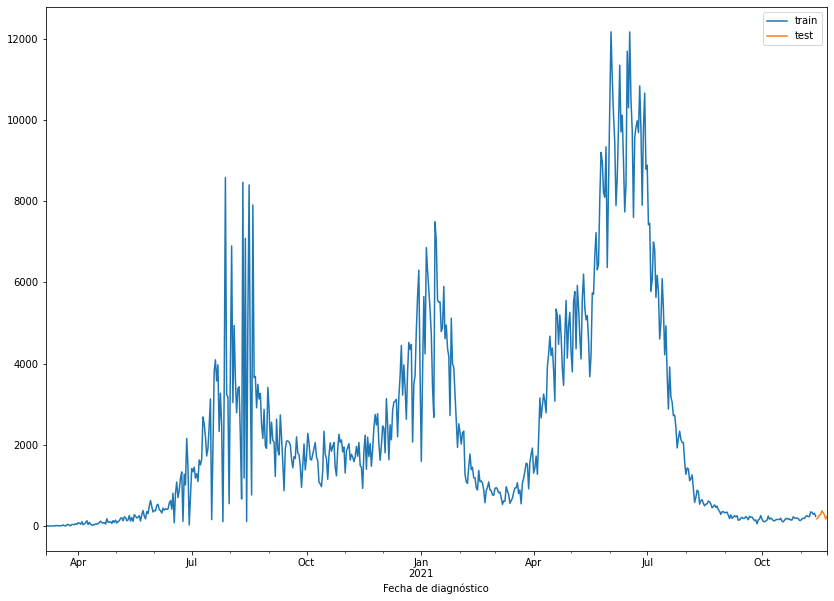

In [182]:
steps = 9
datos_train = serie[:-steps]
datos_test  = serie[-steps:]

fig, ax=plt.subplots(figsize=(14, 10))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
ax.legend();

In [189]:
forecaster_rf = ForecasterAutoreg(
                    regressor=RandomForestRegressor(random_state=123),
                    lags=60
                )

forecaster_rf.fit(y=datos_train)

forecaster_rf

=======================ForecasterAutoreg=======================
Regressor: RandomForestRegressor(random_state=123)
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
Exogenous variable: False, None
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}

In [191]:
forecaster_rf = ForecasterAutoreg(
                    regressor=RandomForestRegressor(random_state=123),
                    lags=60
                )

forecaster_rf.fit(y=datos_train)

forecaster_rf

=======================ForecasterAutoreg=======================
Regressor: RandomForestRegressor(random_state=123)
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
Exogenous variable: False, None
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}

In [192]:
steps = 9
predicciones = forecaster_rf.predict(steps=steps)
# Se añade el índice temporal a las predicciones
predicciones = pd.Series(data=predicciones, index=datos_test.index)
predicciones.head()

Fecha de diagnóstico
2021-11-14    219.43
2021-11-15    237.22
2021-11-16    229.87
2021-11-17    242.77
2021-11-18    231.54
Freq: D, dtype: float64

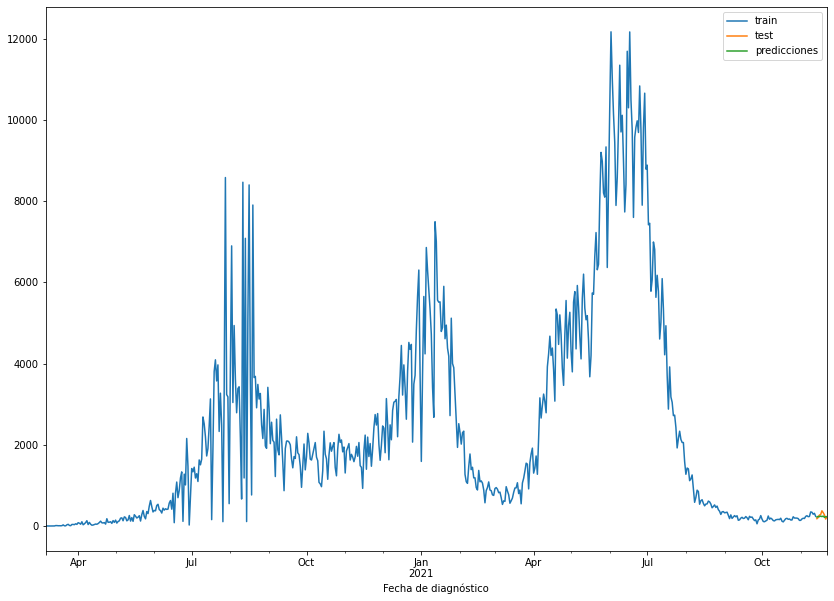

In [193]:
fig, ax = plt.subplots(figsize=(14, 10))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

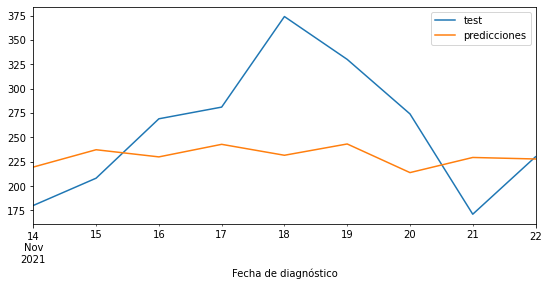

In [195]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [206]:
forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = 60 # Este valor será remplazado en el grid search
                 )

param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

lags_grid = [10, 20]

resultados_grid = grid_search_forecaster(
                        forecaster  = forecaster_rf,
                        y           = datos_train,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 10,
                        method      = 'cv',
                        metric      = 'mean_squared_error',
                        initial_train_size    = int(len(datos_train)*0.5),
                        allow_incomplete_fold = False,
                        return_best = True,
                        verbose     = False
                   )

2021-11-26 00:23:00,437 root       INFO  Number of models compared: 12
loop lags_grid: 100%|██████████| 2/2 [07:21<00:00, 220.92s/it]
2021-11-26 00:30:22,298 root       INFO  Refitting `forecaster` using the best found parameters and the whole data set: 
lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
params: {'max_depth': 10, 'n_estimators': 100}



In [198]:
resultados_grid

,lags,params,metric,max_depth,n_estimators
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",1.519324e+06,10,100
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",1.549155e+06,10,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",1.551192e+06,10,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",1.590803e+06,5,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",1.594255e+06,5,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",1.625812e+06,10,100
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",1.689626e+06,5,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",1.711525e+06,3,500
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",1.713480e+06,5,100
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",1.715244e+06,3,100


In [199]:
regressor = RandomForestRegressor(max_depth=10, n_estimators=500, random_state=123)

forecaster_rf = ForecasterAutoreg(
                    regressor = regressor,
                    lags      = 20
                )

forecaster_rf.fit(y=datos_train)

In [202]:
predicciones = forecaster_rf.predict(steps=steps)
# Se añade el índice a las predicciones
predicciones = pd.Series(data=predicciones, index=datos_test.index)
predicciones

Fecha de diagnóstico
2021-11-14    233.197198
2021-11-15    241.404320
2021-11-16    240.912045
2021-11-17    235.499641
2021-11-18    233.269961
2021-11-19    234.248313
2021-11-20    224.533041
2021-11-21    219.066674
2021-11-22    202.406559
Freq: D, dtype: float64

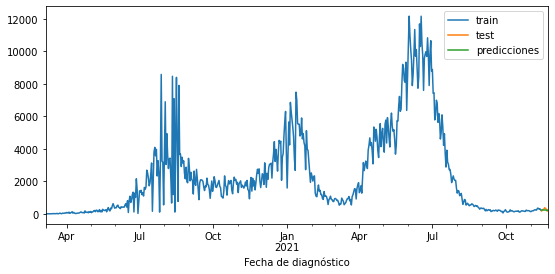

In [203]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

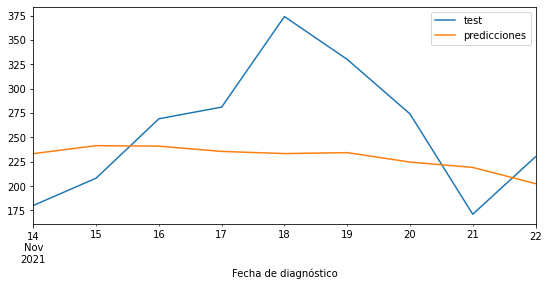

In [205]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();